# Intro to Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, Video

In [2]:
t = %timeit -o [i ** 2 for i in range(100)]

21.5 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
t.best

2.035225060535595e-05

## Storage
`np.ndarray` store continuously in memory

In [4]:
a = np.arange(6, dtype=np.int8)

In [5]:
a1 = a.reshape((2, 3), order='F') # 'F' stands for "Fortran", column-based
a1

array([[0, 2, 4],
       [1, 3, 5]], dtype=int8)

In [6]:
a2 = a.reshape((2, 3)) # row-based
a2

array([[0, 1, 2],
       [3, 4, 5]], dtype=int8)

`ndarray.strides` Tuple of bytes to step in each dimension when traversing an array.

In [7]:
a = np.random.rand(10, 3)
a

array([[0.92330789, 0.60410185, 0.8678359 ],
       [0.94678908, 0.41532982, 0.61941757],
       [0.59253427, 0.17354123, 0.30761079],
       [0.61927947, 0.08250497, 0.16495924],
       [0.54250657, 0.93574244, 0.57352918],
       [0.90758973, 0.52972399, 0.6169623 ],
       [0.50019684, 0.797268  , 0.27562855],
       [0.02570403, 0.39220944, 0.17948549],
       [0.46569938, 0.92040663, 0.33627755],
       [0.36980406, 0.81516733, 0.75572535]])

In [8]:
a.dtype # 8 bytes 

dtype('float64')

In [9]:
a.strides

(24, 8)

In [10]:
b = a.transpose()
b.strides

(8, 24)

## Create `ndarray`
1. create from list
`np.array([1, 2, 3])`
2. using numpy functions
```python
np.zeros
np.ones
...
```
3. from file
```python
np.fromfunction
np.fromfile
np.genfromtext
np.loadtxt
```

### Using `numpy` functions

In [11]:
np.full((2,2), 7)

array([[7, 7],
       [7, 7]])

In [12]:
np.arange(9).reshape(3, -1)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [13]:
np.tril(np.arange(9).reshape(3, -1)) # lower triangle

array([[0, 0, 0],
       [3, 4, 0],
       [6, 7, 8]])

### create from file

In [14]:
a = np.genfromtxt("data/test.dat", delimiter=',', comments="#")

In [15]:
a[:10]

array([[0.90561623, 0.98731441, 0.37682335, 0.68365447, 0.6110239 ],
       [0.82015918, 0.70776744, 0.08780582, 0.2398574 , 0.82398316],
       [0.90036869, 0.50303052, 0.75271513, 0.68787283, 0.85938623],
       [0.06011199, 0.41741747, 0.61838903, 0.26120603, 0.07353117],
       [0.63972021, 0.47070615, 0.73818803, 0.23294006, 0.77318268],
       [0.52990883, 0.84194806, 0.67735569, 0.73019749, 0.53413428],
       [0.34242785, 0.25267256, 0.42306813, 0.46650384, 0.68665783],
       [0.8962562 , 0.39165977, 0.07663973, 0.12231222, 0.573405  ],
       [0.94678224, 0.53178447, 0.75454359, 0.61735947, 0.97003014],
       [0.88278845, 0.23147023, 0.6256421 , 0.73120492, 0.88536096]])

Use `pandas` to read file, much faster than `numpy`

In [16]:
%timeit np.genfromtxt("data/test.dat", delimiter=',', comments="#")

4.91 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%timeit np.loadtxt("data/test.dat", delimiter=',')

6.55 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
import pandas as pd

In [19]:
%timeit pd.read_csv("data/test.dat", sep=',', comment='#')

2.66 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Copy and View

all copies in `numpy` are deep copy.

In [20]:
a = np.arange(10)
b = a[::2]
b1 = a[5:]
c = a.copy()

In [21]:
np.shares_memory(a, b)

True

In [22]:
np.may_share_memory(a, b)

True

what the difference between `shares_memory` and `may_share_memory`? why would we want to use `may_share_memory`

In [23]:
np.shares_memory(b, b1)

True

In [24]:
np.shares_memory(a, c)

False

In [25]:
a.base is b # Base object if memory is from some other object.

False

In [26]:
b.base is a

True

In [27]:
print(c.base)

None


| <i></i> | **View** | **Copy** |
| :---: | :---: | :---: |
| **Slices** | Indexing, e.g. `z[0,:]` | Fancy Indexing, e.g. `z[[0],:]` |
| **Changing dtype** | / | `w = z.as_type(np.float32)` |
| **Converting to 1D array** | `z.ravel()` | `z.flatten()` |

| **Index** | **Indexint(View)** | **Fancy Indexing(Copy)** |
| :---: | :---: | :---: |
| **Non-tuple(2D array)** | `z[1:4,:]` | `z[[1,2,3],:]` |
| **Non-tuple(1D array)** | `A[1]` | `A[[1]]` |
| **Tuple** | `A[(1,2,3)]` | `A[[1,2,3]], A[(1,2,3),]` |

[Views versus copies in NumPy](https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html)

## Arithmatic Operations
```python
matrix multiplication: A @ B === A.dot(B)

```

## Conditional Operations
```python
np.where        # Choose values from two arrays depending on the value of a given condition array
np.choose       # Choose values from a list of arrays depending on the values of a given index array
np.select       # Choose values from a list of arrays depending on a list of conditions
np.nonzero      # Return an array with indices of nonzero elements
np.logical_and  # elementwise AND
```


In [28]:
# np.select?? # view source code

SyntaxError: invalid syntax (<ipython-input-28-0a88894618c2>, line 1)

In [29]:
a = np.random.random(10)*2 + -1 # random with(-1, 1)
a

array([-0.25375682, -0.3383576 ,  0.82329617, -0.77765782, -0.56382703,
       -0.16391178, -0.18520376, -0.84673983,  0.76956934, -0.27309699])

In [30]:
np.select([a<0], [a*-1])

array([0.25375682, 0.3383576 , 0.        , 0.77765782, 0.56382703,
       0.16391178, 0.18520376, 0.84673983, 0.        , 0.27309699])

In [31]:
np.select([a>0, a<0], [a, a*-1])

array([0.25375682, 0.3383576 , 0.82329617, 0.77765782, 0.56382703,
       0.16391178, 0.18520376, 0.84673983, 0.76956934, 0.27309699])

## Broadcasting

In [32]:
np.empty_like(a) # Return a new array with the same shape and type as a given array.

array([0.25375682, 0.3383576 , 0.82329617, 0.77765782, 0.56382703,
       0.16391178, 0.18520376, 0.84673983, 0.76956934, 0.27309699])

## Shape Operations
```python
np.squeeze
np.hstack
np.vstack
np.dstack
...
```

## Reference

1. [Numerical Python: A Practical Techniques Approach for Industry](https://www.amazon.com/Numerical-Python-Practical-Techniques-Approach/dp/1484205545)
1. [Guide to NumPy, by the creator of Numpy](http://web.mit.edu/dvp/Public/numpybook.pdf)
1. [Scipy Lecture Notes](http://www.scipy-lectures.org/intro/numpy/)
1. [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy)

# Intro to [Numba](http://numba.pydata.org/)

For Numerical Calculations.  
Using JIT to speed up, different from Cython.

**Limitations:**  
+ Only support part of Python features
+ hard to debug

In [33]:
%pylab inline
import numpy as np
import numba
from numba import njit, vectorize

Populating the interactive namespace from numpy and matplotlib


In [34]:
m = 5
n = 3
p = 6
a = np.random.rand(n, m)
b = np.random.rand(m, p)

In [35]:
def dot_py(a, b):
    n, m = a.shape
    m, p = b.shape
    c = np.zeros((n, p))
    for i in range(n):
        for j in range(p):
            for k in range(m):
                c[i][j] += a[i][k] * b[k][j]
    return c

In [36]:
# thread parallel(open mp?), optimize order, no gil lock
@njit(parallel=True, fastmath=True, nogil=True) # 'n' stands for "nopython"
# @jit(nopython=True, parallel=True, fastmath=True, nogil=True)
def dot_numba(a, b):
    n, m = a.shape
    m, p = b.shape
    c = np.zeros((n, p))
    for i in range(n):
        for j in range(p):
            for k in range(m):
                c[i][j] += a[i][k] * b[k][j]
    return c

In [37]:
dot_numba = njit(parallel=True, fastmath=True, nogil=True)(dot_py) # equivalent to the above 

In [38]:
t0 = %timeit -o  a @ b # based on Intel Math Kernel Library (MKL), Fortran under the hood

639 ns ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [39]:
t1 = %timeit -o dot_py(a,b)

89.6 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
t2 = %timeit -o  dot_numba(a,b)

21.1 µs ± 8.38 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
print("numba: ", t1.best/t2.best)
print("numpy: ", t1.best/t0.best)

numba:  5.0937960856437
numpy:  140.97521387363835


## segmented function
`numba` is particularly useful when the function does not exist in `numpy`
$$ 
\Theta(x)=\left\{\begin{array}{l}{0, x<0} \\ {\frac{1}{2}, x=0} \\ {1, x>0}\end{array}\right.
 $$

In [42]:
def py_Heaviside(x):
    if x == 0.0:
        return 0.5
    elif x < 0.0:
        return 0.0
    else:
        return 1.0

In [43]:
np_vec_Heaviside = np.vectorize(py_Heaviside)

In [44]:
def np_Heaviside(x):
    return (x > 0.0) + (x == 0.0)*0.5

In [45]:
@vectorize(fastmath=True)
def jit_Heaviside(x):
    if x == 0.0:
        return 0.5
    elif x < 0.0:
        return 0.0
    else:
        return 1.0

In [46]:
x = np.linspace(-5, 5, 10000)

In [47]:
%timeit [py_Heaviside(i) for i in x]

2.78 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
%timeit np_vec_Heaviside(x)

1.34 ms ± 26.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [49]:
%timeit np_Heaviside(x)

24.8 µs ± 895 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [50]:
%timeit jit_Heaviside(x)

2.57 µs ± 86.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Julia fractal

In [51]:
def py_julia_fractal(z_re, z_im, j, n=2, nmax=500, c=0.279):
    for m in range(len(z_re)):
        for n in range(len(z_im)):
            z = z_re[m] + 1j * z_im[n]
            for t in range(nmax):
                z = z ** 2 + c
                if np.abs(z) > 2.0:
                    j[m, n] = t 
                    break

In [52]:
jit_julia_fractal = njit(parallel=True, fastmath=True, nogil=True)(py_julia_fractal)

In [53]:
N = 1024
j = np.zeros((N, N), np.int64)
z_real = np.linspace(-1.5, 1.5, N)
z_imag = np.linspace(-1.5, 1.5, N)

In [62]:
t1 = %timeit -o -n 1 -r 1 py_julia_fractal(z_real, z_imag, j) # very slow

20.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [61]:
t2 = %timeit -o jit_julia_fractal(z_real, z_imag, j)

32.6 ms ± 790 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
t1.best / t2.best

638.1769881376488

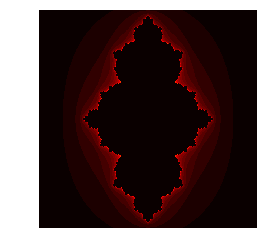

In [56]:
j = np.zeros((N, N), np.int64)
jit_julia_fractal(z_real, z_imag, j, c = 1-(1+5**0.5)/2, nmax=100)
imshow(j, cmap=plt.cm.hot, extent=[-1.5, 1.5, -1.5, 1.5])
axis('off');

Following:   
`SymPy`: symbolic computation (computer algebra), e.g., Calculus  
`SciPy`  
`Matplotlib`  
`Pandas`  
`Cython`  

sidenote: 
`jupyter` stands for Julia, Python, R